# Part 1

Load dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_prediction_dataset.csv", sep=",")

df = df[0:10000]

print(df)



      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  80.0             0              1           never  25.19   
1     Female  54.0             0              0         No Info  27.32   
2       Male  28.0             0              0           never  27.32   
3     Female  36.0             0              0         current  23.45   
4       Male  76.0             1              1         current  20.14   
...      ...   ...           ...            ...             ...    ...   
9995  Female   9.0             0              0           never  25.28   
9996    Male  59.0             0              0            ever  35.00   
9997    Male   2.0             0              0           never  17.43   
9998    Male  61.0             1              0            ever  31.89   
9999    Male  43.0             0              0           never  30.24   

      HbA1c_level  blood_glucose_level  diabetes  
0             6.6                  140         0  
1        

Format dataset

In [2]:
#Remove duplicates
df = df.drop_duplicates()

#Remove Other category
df = df[df['gender'] != 'Other']

print(df)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  80.0             0              1           never  25.19   
1     Female  54.0             0              0         No Info  27.32   
2       Male  28.0             0              0           never  27.32   
3     Female  36.0             0              0         current  23.45   
4       Male  76.0             1              1         current  20.14   
...      ...   ...           ...            ...             ...    ...   
9995  Female   9.0             0              0           never  25.28   
9996    Male  59.0             0              0            ever  35.00   
9997    Male   2.0             0              0           never  17.43   
9998    Male  61.0             1              0            ever  31.89   
9999    Male  43.0             0              0           never  30.24   

      HbA1c_level  blood_glucose_level  diabetes  
0             6.6                  140         0  
1        

Convert categorial data into numerical values

In [3]:
def one_hot_encoding(df, column):
    #Perform one-hot encoding on the column and place it in a temp column
    temp = pd.get_dummies(df[column], prefix=column)

    #Replace the original column with the temp column
    df = pd.concat([df.drop(column, axis=1), temp], axis=1)

    return df

#One hot encode the gender column
df = one_hot_encoding(df, 'gender')

#One hot encode the smoking history column
df = one_hot_encoding(df, 'smoking_history')


In [4]:
print(df[0:2])

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   

   diabetes  gender_Female  gender_Male  smoking_history_No Info  \
0         0           True        False                    False   
1         0           True        False                     True   

   smoking_history_current  smoking_history_ever  smoking_history_former  \
0                    False                 False                   False   
1                    False                 False                   False   

   smoking_history_never  smoking_history_not current  
0                   True                        False  
1                  False                        False  


# Correlation Plot

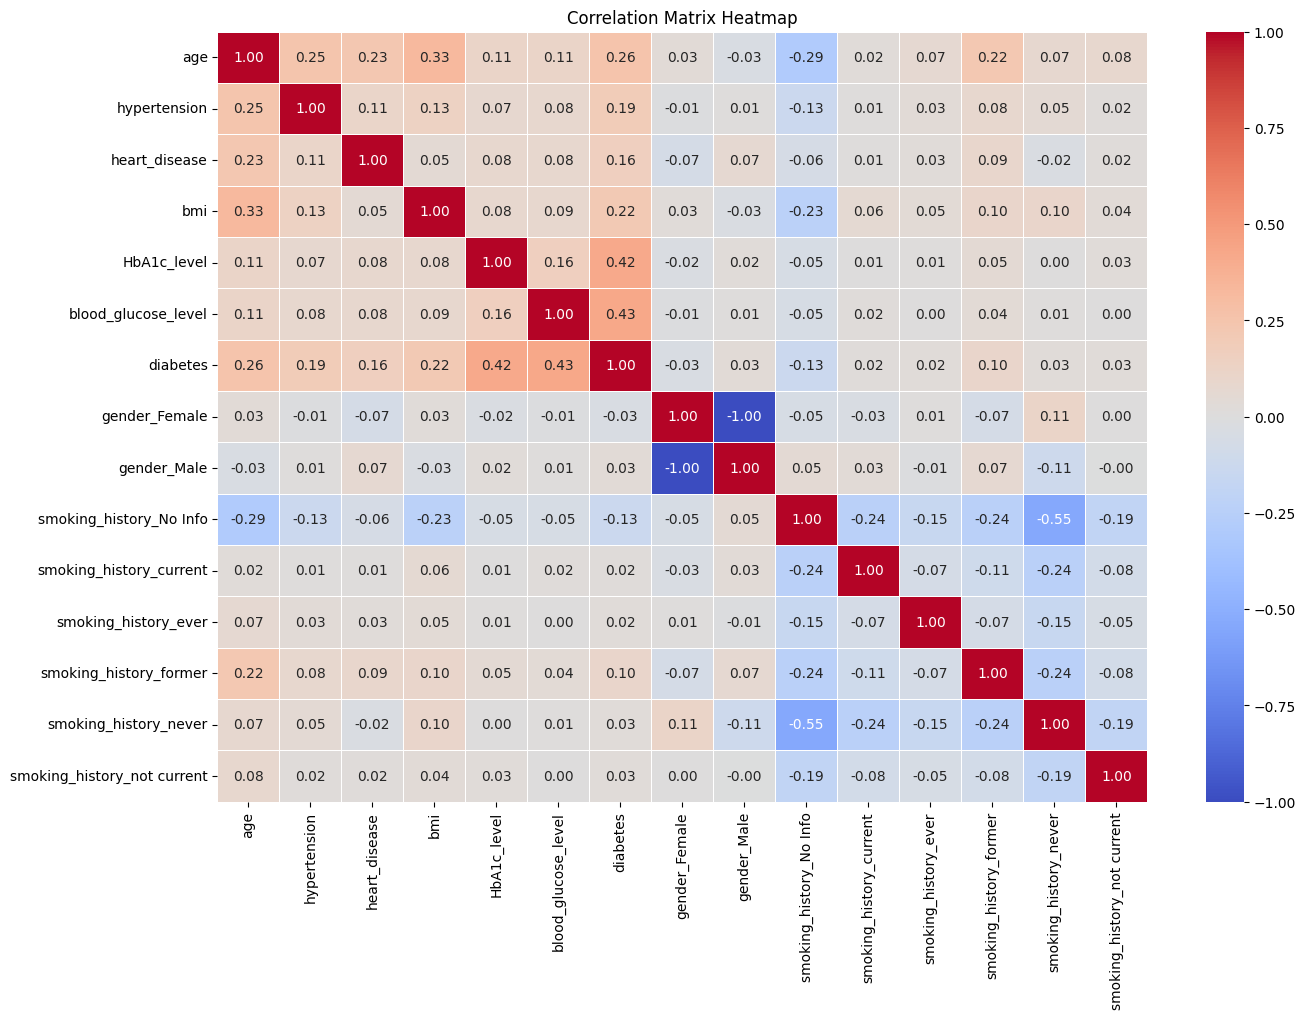

In [5]:
correlation_matrix = df.corr()

import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Seperate features and the target (diabetes)

In [6]:
x = np.array( df[['gender_Male','gender_Female','age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']] )
print(x[0:3])

y = np.array( df['diabetes'] )
print('')
print(y[0:3])

[[False True 80.0 0 1 25.19 6.6 140]
 [False True 54.0 0 0 27.32 6.6 80]
 [True False 28.0 0 0 27.32 5.7 158]]

[0 0 0]


# PCA 

In [12]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(x_pca)
print(explained_variance)

[[  5.32950636 -37.33441834]
 [-56.62270701 -16.96483596]
 [ 18.86461953  15.55060674]
 ...
 [-15.39817027  39.55841415]
 [  3.81941156 -19.17615832]
 [ -7.69965053  -2.03495722]]
[0.75860578 0.22323403]


# UMAP

C:\Users\fchav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

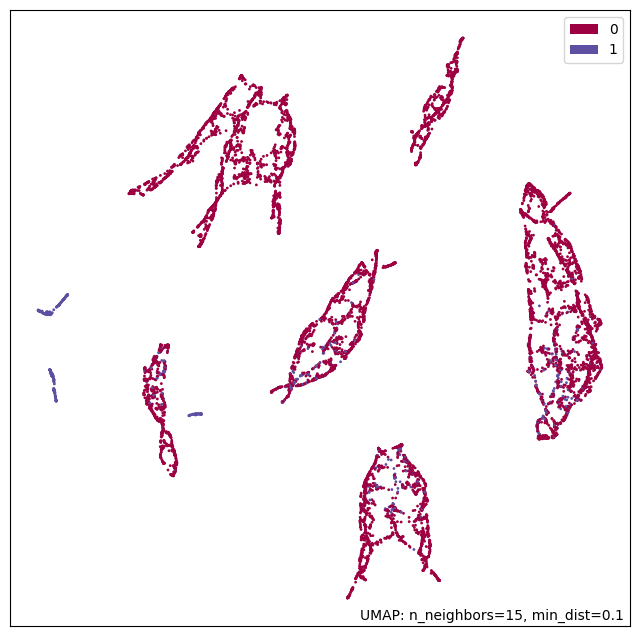

In [8]:
import umap 
import umap.plot

mapper = umap.UMAP().fit(x)
umap.plot.points(mapper, labels=y)

[[13.830061   6.635674 ]
 [-1.9665993 16.05144  ]
 [ 4.2775917 -6.701616 ]
 ...
 [15.1650505 -6.152881 ]
 [14.561081   8.721826 ]
 [17.89463   -1.0919952]]


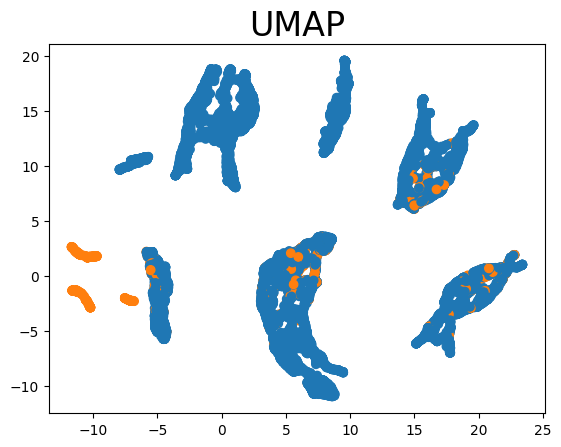

In [9]:
#Alternative way to plot UMAP 

embedding = umap.UMAP().fit_transform(x)
print(embedding)

'''
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.values.map(
        {'gender_Male':0,'gender_Female':1,'age':2,'hypertension':3,'heart_disease':4,'bmi':5,'HbA1c_level':6,'blood_glucose_level':7}
        )])
'''

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.diabetes.map({0: 0, 1: 1})]
)


#plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24);

# T-SNE

In [17]:
from sklearn.manifold import TSNE


model = TSNE(n_components = 3, random_state = 0)

tsne_data = model.fit_transform(x)

#tsne_data = np.vstack((tsne_data.T, x)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 
